In [61]:
%matplotlib inline
from modsim import *

init = State(Sh=100, Ih=0, Rh=0, Sm=95, Im=5)

h_birth_rate = 0.00213
h_death_rate = 0.001

m_birth_rate = 0.03
m_death_rate = 0.03

a = 0.3
b = 0.07
c = 0.2
v = 20

def make_system(t0=0, t_end=20):
    init = State(Sh=100, Ih=0, Rh=0, Sm=90, Im=10)
    
    return System(init=init, t0=t0, t_end=t_end)

def add_vaccine(system, doses):
    system.init.Sh -= doses
    system.init.Rh += doses

def update(state, system):
    s1, i1, r1, s2, i2 = state
    
    h_pop = s1 + i1 + r1
    m_pop = s2 + i2
    
    born = h_birth_rate * h_pop
    m_deaths = m_death_rate * m_pop
    h_deaths = h_death_rate * h_pop
    
    infected_h = (a*s1*i2) / h_pop
    
    recovered = b*i1
    
    infected_m = (c*i1*s2) / m_pop
    
    s1 += -infected_h  + born - (h_deaths/3)
    i1 += infected_h - recovered - (h_deaths/3)
    r1 += recovered - (h_deaths/3)
    s2 -= infected_m
    i2 += infected_m - m_deaths
    
    return State(Sh=s1, Ih=i1, Rh=r1, Sm=s2, Im=i2)


def run_simulation(system, update_func):
    Sh = TimeSeries()
    Ih = TimeSeries()
    Rh = TimeSeries()
    
    Sm = TimeSeries()
    Im = TimeSeries()
    
    state = system. init
    t0 = system.t0
    
    Sh[t0], Ih[t0], Rh[t0], Sm[t0], Im[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        
        Sh[t+1], Ih[t+1], Rh[t+1], Sm[t+1], Im[t+1] = state
        
    system.Sh = Sh
    system.Ih = Ih
    system.Rh = Rh
    system.Sm = Sm
    system.Im = Im
    
def plot_results1(S, I, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Population')
    
def plot_results2(S, I):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    decorate(xlabel='Time (days)',
             ylabel='Population')


0     100.000000
1     100.113000
2     100.226128
3     100.339383
4     100.452767
5     100.566278
6     100.679918
7     100.793687
8     100.907583
9     101.021609
10    101.135763
11    101.250047
12    101.364459
13    101.479001
14    101.593672
15    101.708473
16    101.823404
17    101.938464
18    102.053655
19    102.168975
20    102.284426
21    102.400008
dtype: float64


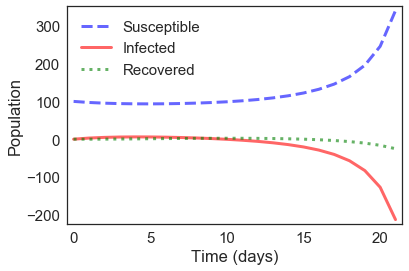

In [63]:
system = make_system()

run_simulation(system, update)

plot_results1(system.Sh, system.Ih, system.Rh)
print(system.Sh + system.Ih + system.Rh)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


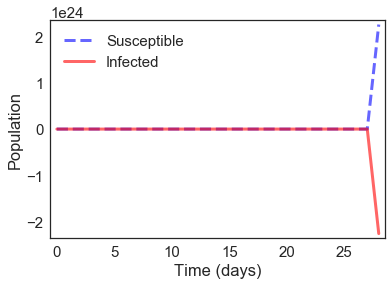

In [58]:
system = make_system()

run_simulation(system, update)

plot_results2(system.Sm, system.Im)
#print(system.Sm + system.Im)

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
5      100.0
6      100.0
7      100.0
8      100.0
9      100.0
10     100.0
11     100.0
12     100.0
13     100.0
14     100.0
15     100.0
16     100.0
17     100.0
18     100.0
19     100.0
20     100.0
21     100.0
22     100.0
23     100.0
24     100.0
25     100.0
26     100.0
27     100.0
28     100.0
29     100.0
       ...  
72     100.0
73     100.0
74     100.0
75     100.0
76     100.0
77     100.0
78     100.0
79     100.0
80     100.0
81     100.0
82     100.0
83     100.0
84     100.0
85     100.0
86     100.0
87     100.0
88     100.0
89     100.0
90     100.0
91     100.0
92     100.0
93     100.0
94     100.0
95     100.0
96     100.0
97     100.0
98     100.0
99     100.0
100    100.0
101    100.0
Length: 102, dtype: float64


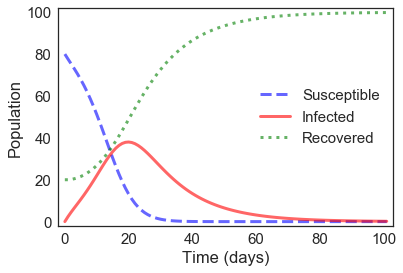

In [52]:
system = make_system()
add_vaccine(system, v)

run_simulation(system, update)

plot_results1(system.Sh, system.Ih, system.Rh)
#print(system.Sh + system.Ih + system.Rh)